In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20698524.31it/s]                            


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


32768it [00:00, 327386.83it/s]
0it [00:00, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw


1654784it [00:00, 5310981.77it/s]                           
8192it [00:00, 130905.21it/s]


Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw
Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw
Processing...
Done!


In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set Hyper-parameters (change None)
BATCH_SIZE = 64
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002
N_EPOCH = 100

In [0]:
# Define Train loader
train_tensors = original_train_dataset.data.float() / 255
test_tensors = original_test_dataset.data.float() / 255

train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.dropout1 = nn.Dropout()
        self.lin=nn.Linear(784,256)
        self.lin2=nn.Linear(256,128)
        self.lin3=nn.Linear(128,64)
        self.dropout2 = nn.Dropout()
        self.lin4=nn.Linear(64,1)

    def forward(self, img):
      img=self.dropout1(img)
      img=self.lin(img)
      img=F.leaky_relu(img,.2)
      img=self.lin2(img)
      img=F.leaky_relu(img,.2)
      img=self.lin3(img)
      img=self.dropout2(img)
      img=F.leaky_relu(img,.2)
      img=self.lin4(img)
      return F.sigmoid(img)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.lin=nn.Linear(128,128)
        self.lin2=nn.Linear(128,256)
        self.lin3=nn.Linear(256,512)
        self.lin4=nn.Linear(512,784)

    def forward(self, z):
      z=self.lin(z)
      z=F.leaky_relu(z,.2)
      z=self.lin2(z)
      z=F.leaky_relu(z,.2)
      z=self.lin3(z)
      z=F.leaky_relu(z,.2)
      z=self.lin4(z)
      return F.sigmoid(z)

D = Discriminator()
G = Generator()

In [0]:
# Device setting
D = D
G = G

In [0]:
# Create two optimizer for discriminator and generator (change None), you can also change the optimizer
opt_D = optim.Adam(D.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(G.parameters(), lr=LEARNING_RATE_G)
# Loss function (use ".to(device)" to use gpu(cuda))
loss_function = None 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 3) # set default size of plots

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 1 	 last batch loss D: 0.3142988383769989 	 last batch loss G: 3.9480419158935547


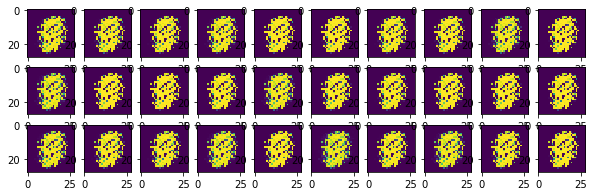

epoch: 2 	 last batch loss D: 0.9363446235656738 	 last batch loss G: 3.3854660987854004


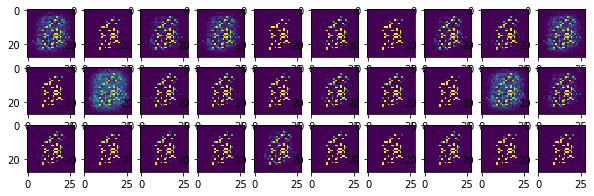

epoch: 3 	 last batch loss D: 0.31629252433776855 	 last batch loss G: 5.011343479156494


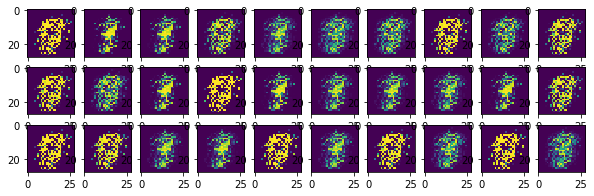

epoch: 4 	 last batch loss D: 0.5171692371368408 	 last batch loss G: 3.9706497192382812


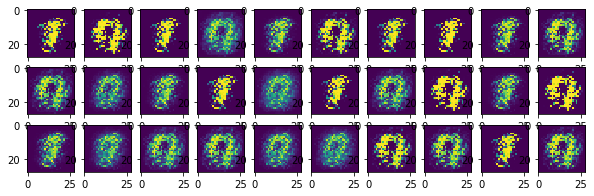

epoch: 5 	 last batch loss D: 0.271179735660553 	 last batch loss G: 3.51371169090271


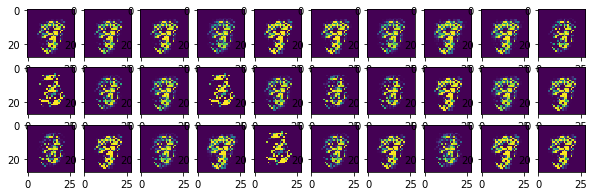

epoch: 6 	 last batch loss D: 0.3752676546573639 	 last batch loss G: 2.804417371749878


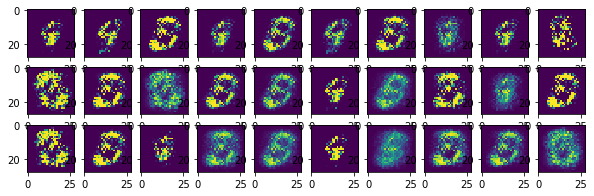

epoch: 7 	 last batch loss D: 0.3615300953388214 	 last batch loss G: 2.796081781387329


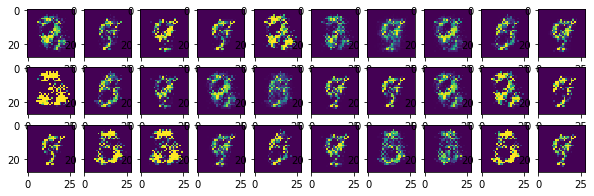

epoch: 8 	 last batch loss D: 0.5563421249389648 	 last batch loss G: 2.4392776489257812


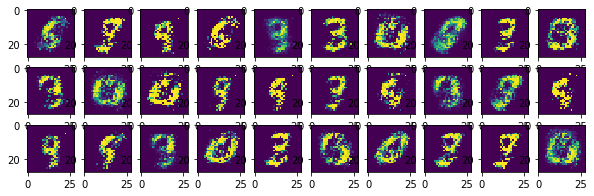

epoch: 9 	 last batch loss D: 0.39347225427627563 	 last batch loss G: 2.5009713172912598


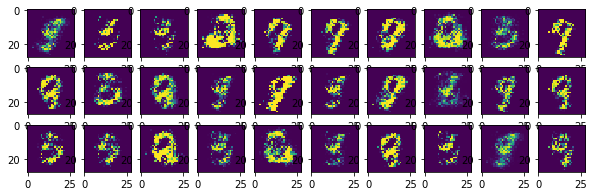

epoch: 10 	 last batch loss D: 0.45362329483032227 	 last batch loss G: 2.248831272125244


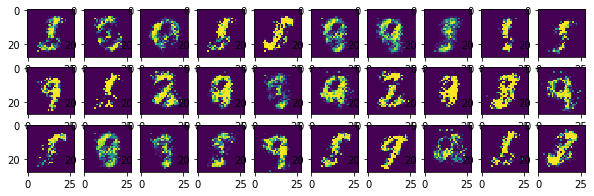

epoch: 11 	 last batch loss D: 0.6638466715812683 	 last batch loss G: 2.045236587524414


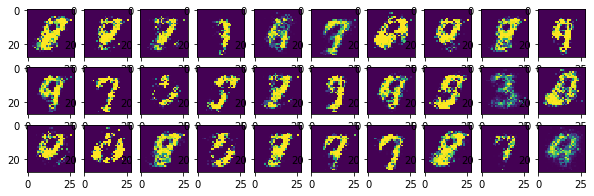

epoch: 12 	 last batch loss D: 0.7017671465873718 	 last batch loss G: 2.1184308528900146


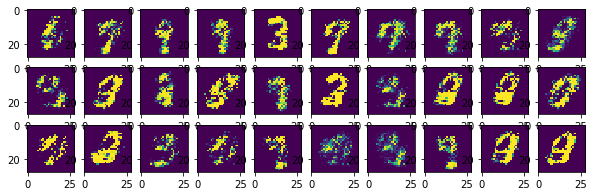

epoch: 13 	 last batch loss D: 0.7757090926170349 	 last batch loss G: 1.9036518335342407


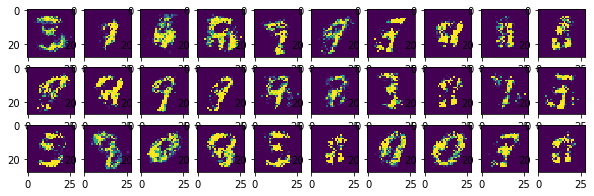

epoch: 14 	 last batch loss D: 0.626632571220398 	 last batch loss G: 2.2974748611450195


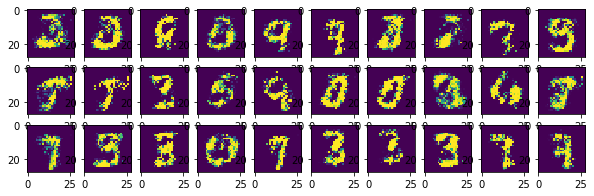

epoch: 15 	 last batch loss D: 0.654446542263031 	 last batch loss G: 1.9441916942596436


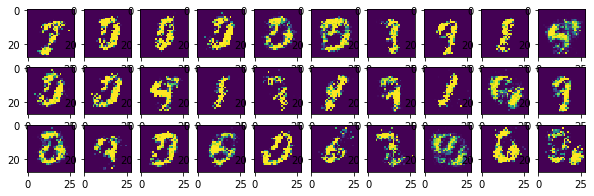

epoch: 16 	 last batch loss D: 0.7369071841239929 	 last batch loss G: 2.265167474746704


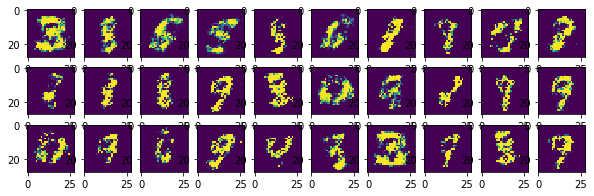

epoch: 17 	 last batch loss D: 0.7221565246582031 	 last batch loss G: 1.8534501791000366


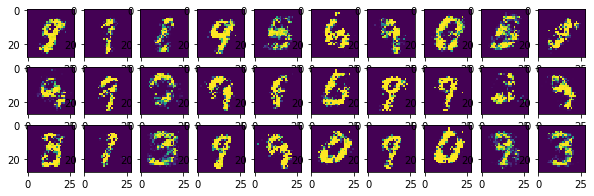

epoch: 18 	 last batch loss D: 0.6302567720413208 	 last batch loss G: 1.7685003280639648


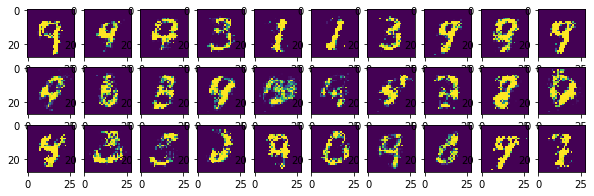

epoch: 19 	 last batch loss D: 0.914879322052002 	 last batch loss G: 1.6491649150848389


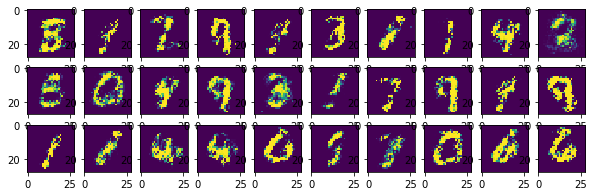

epoch: 20 	 last batch loss D: 0.8904274702072144 	 last batch loss G: 1.7690681219100952


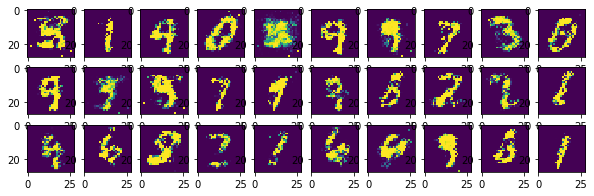

epoch: 21 	 last batch loss D: 0.8106478452682495 	 last batch loss G: 1.512773871421814


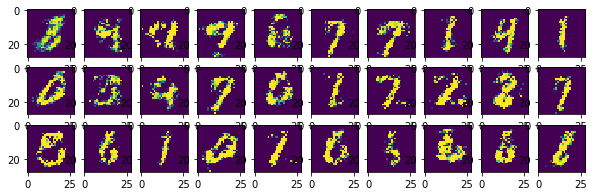

epoch: 22 	 last batch loss D: 1.1863657236099243 	 last batch loss G: 1.6204557418823242


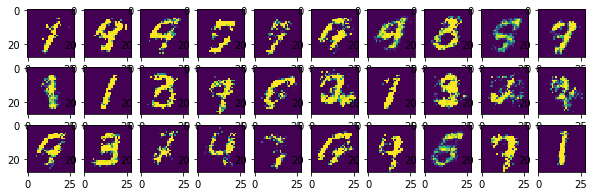

epoch: 23 	 last batch loss D: 1.1506344079971313 	 last batch loss G: 1.3035073280334473


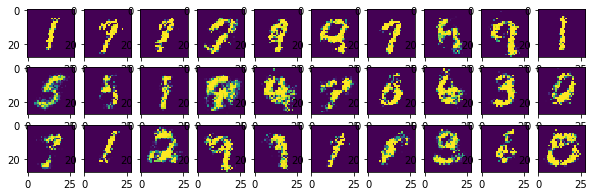

epoch: 24 	 last batch loss D: 1.1223726272583008 	 last batch loss G: 1.2711533308029175


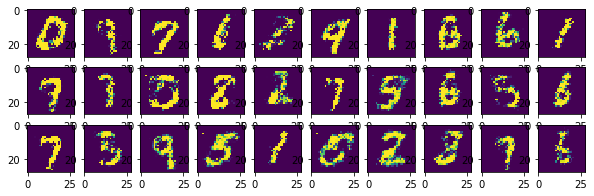

epoch: 25 	 last batch loss D: 0.8129581212997437 	 last batch loss G: 1.3409099578857422


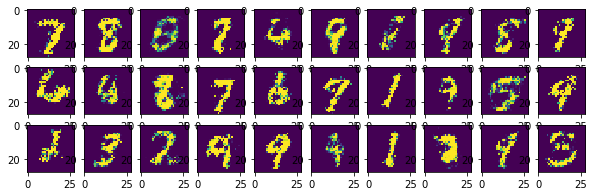

epoch: 26 	 last batch loss D: 0.8545690774917603 	 last batch loss G: 1.3282262086868286


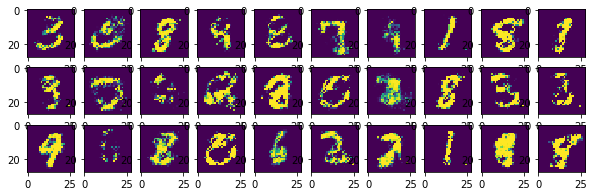

epoch: 27 	 last batch loss D: 0.8927446603775024 	 last batch loss G: 1.352599859237671


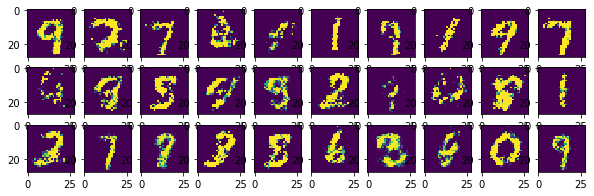

epoch: 28 	 last batch loss D: 0.935886025428772 	 last batch loss G: 1.2551459074020386


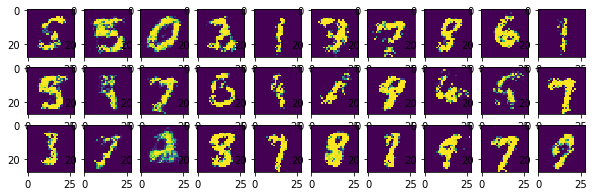

epoch: 29 	 last batch loss D: 1.129887342453003 	 last batch loss G: 1.155274510383606


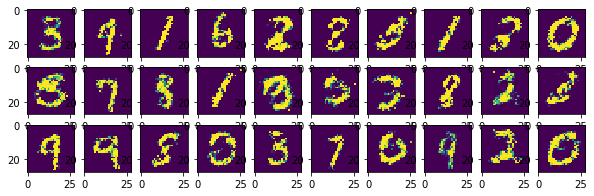

epoch: 30 	 last batch loss D: 1.1790878772735596 	 last batch loss G: 1.2652519941329956


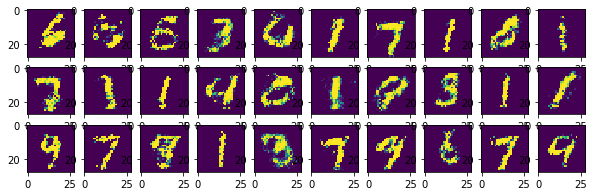

epoch: 31 	 last batch loss D: 1.1452654600143433 	 last batch loss G: 1.2707380056381226


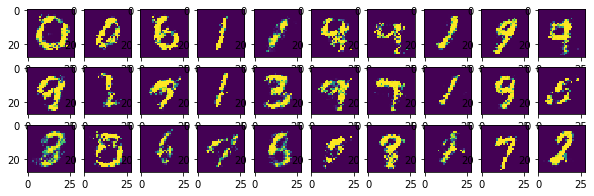

epoch: 32 	 last batch loss D: 0.9019038677215576 	 last batch loss G: 1.2415587902069092


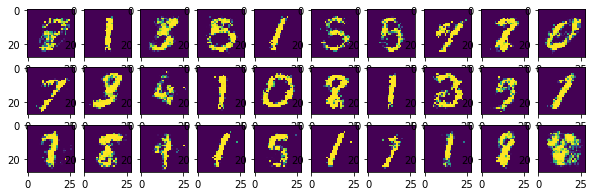

epoch: 33 	 last batch loss D: 1.0018006563186646 	 last batch loss G: 1.0730770826339722


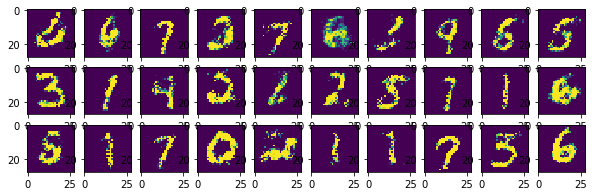

epoch: 34 	 last batch loss D: 1.2951147556304932 	 last batch loss G: 1.1149022579193115


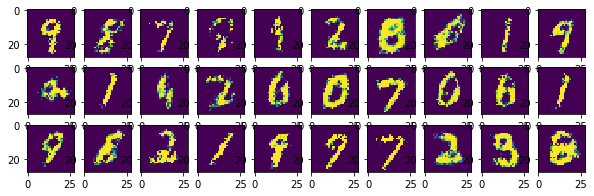

epoch: 35 	 last batch loss D: 1.1595803499221802 	 last batch loss G: 1.006120204925537


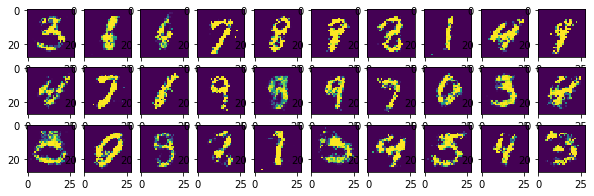

epoch: 36 	 last batch loss D: 1.2338420152664185 	 last batch loss G: 1.039494276046753


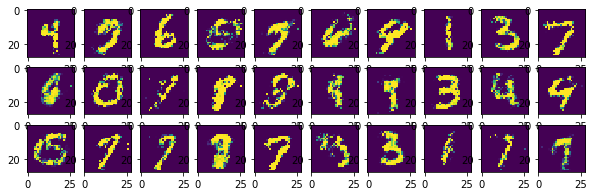

epoch: 37 	 last batch loss D: 1.0284147262573242 	 last batch loss G: 1.2306833267211914


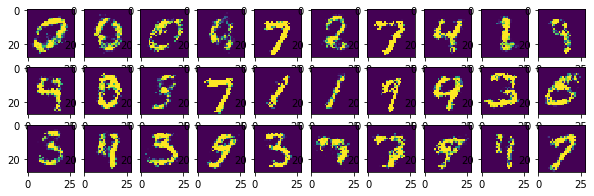

epoch: 38 	 last batch loss D: 1.0316174030303955 	 last batch loss G: 1.0020071268081665


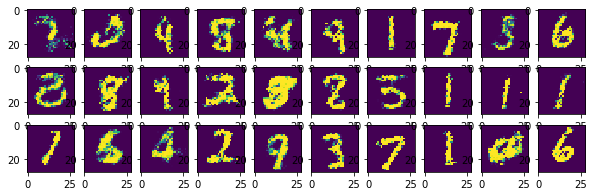

epoch: 39 	 last batch loss D: 1.0648777484893799 	 last batch loss G: 1.1399617195129395


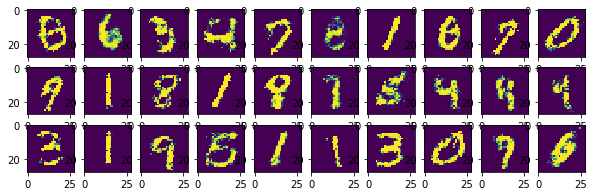

epoch: 40 	 last batch loss D: 1.0177371501922607 	 last batch loss G: 1.1243870258331299


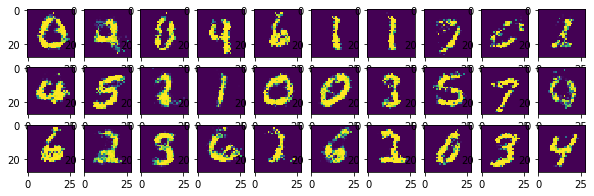

epoch: 41 	 last batch loss D: 1.0990076065063477 	 last batch loss G: 1.0072284936904907


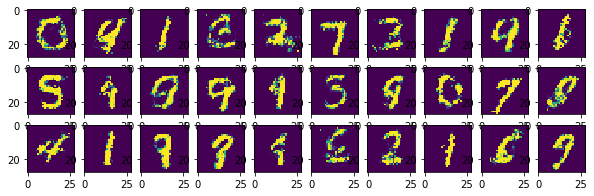

epoch: 42 	 last batch loss D: 1.2152554988861084 	 last batch loss G: 0.9921693801879883


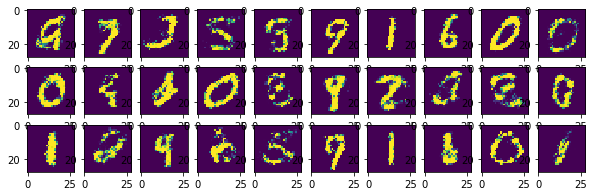

epoch: 43 	 last batch loss D: 0.9977134466171265 	 last batch loss G: 1.131716012954712


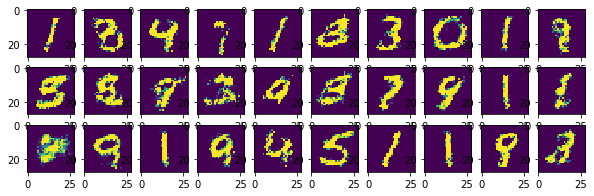

epoch: 44 	 last batch loss D: 1.2716295719146729 	 last batch loss G: 1.0073320865631104


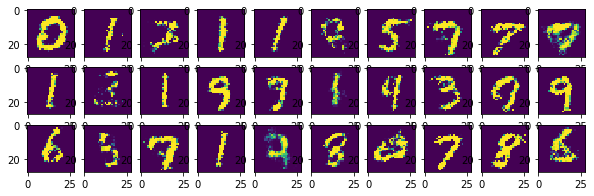

epoch: 45 	 last batch loss D: 1.0299839973449707 	 last batch loss G: 0.9818472266197205


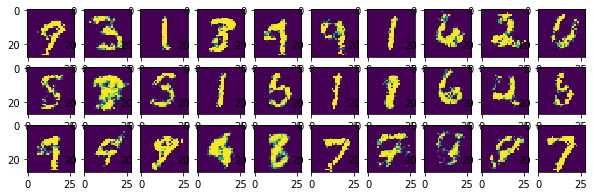

epoch: 46 	 last batch loss D: 1.3344875574111938 	 last batch loss G: 1.0434544086456299


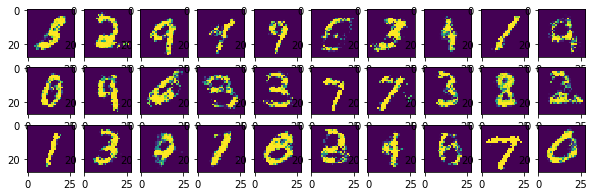

epoch: 47 	 last batch loss D: 1.2029896974563599 	 last batch loss G: 0.983433723449707


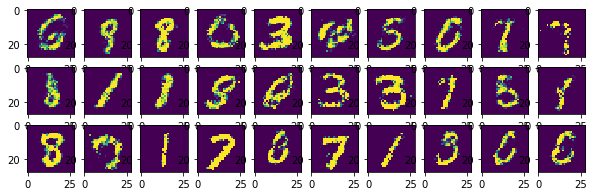

epoch: 48 	 last batch loss D: 0.9972960948944092 	 last batch loss G: 0.8957222700119019


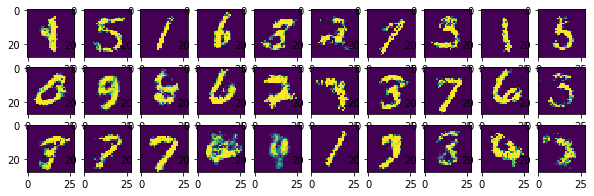

epoch: 49 	 last batch loss D: 1.3573344945907593 	 last batch loss G: 1.0763944387435913


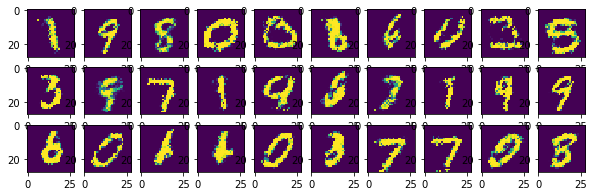

epoch: 50 	 last batch loss D: 1.3512113094329834 	 last batch loss G: 1.089324712753296


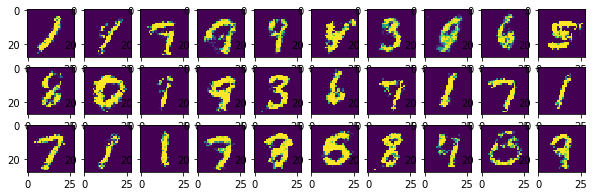

epoch: 51 	 last batch loss D: 1.1487452983856201 	 last batch loss G: 0.9663257002830505


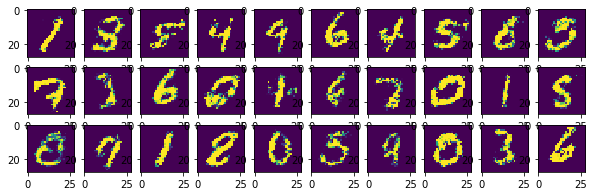

epoch: 52 	 last batch loss D: 1.1075127124786377 	 last batch loss G: 0.9733846783638


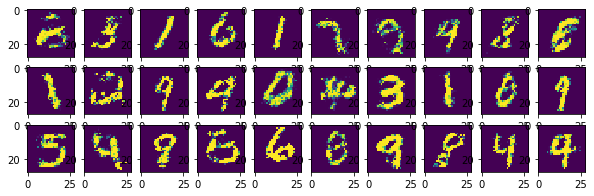

epoch: 53 	 last batch loss D: 1.2603702545166016 	 last batch loss G: 1.0860422849655151


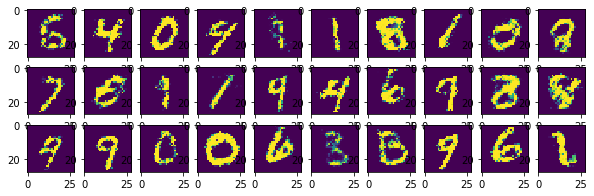

epoch: 54 	 last batch loss D: 1.2525464296340942 	 last batch loss G: 1.0312484502792358


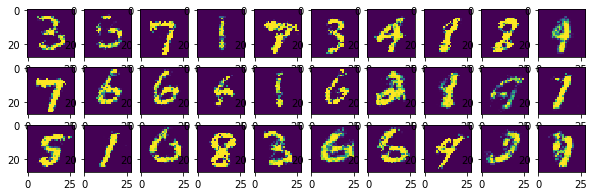

epoch: 55 	 last batch loss D: 1.339095950126648 	 last batch loss G: 1.0021616220474243


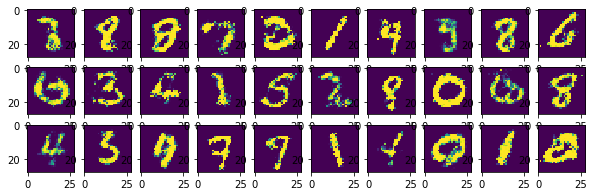

epoch: 56 	 last batch loss D: 1.214836835861206 	 last batch loss G: 0.850433349609375


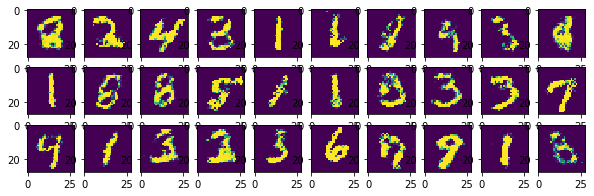

epoch: 57 	 last batch loss D: 1.2044081687927246 	 last batch loss G: 0.9318170547485352


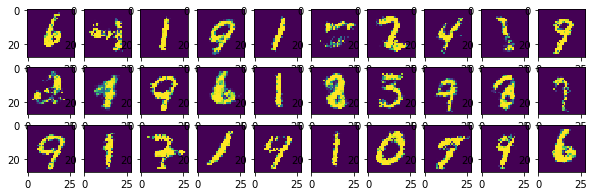

epoch: 58 	 last batch loss D: 1.0697938203811646 	 last batch loss G: 0.9776344299316406


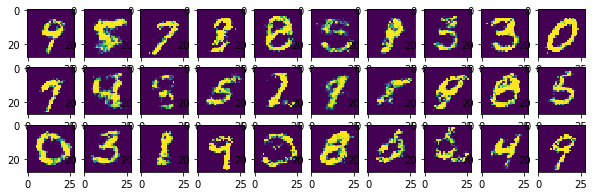

epoch: 59 	 last batch loss D: 1.1565163135528564 	 last batch loss G: 0.9563022255897522


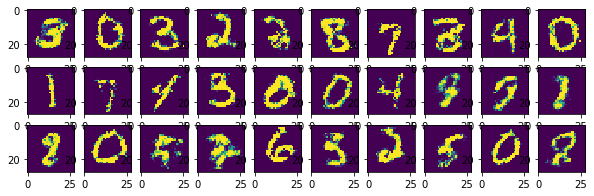

epoch: 60 	 last batch loss D: 1.272982120513916 	 last batch loss G: 0.9269996285438538


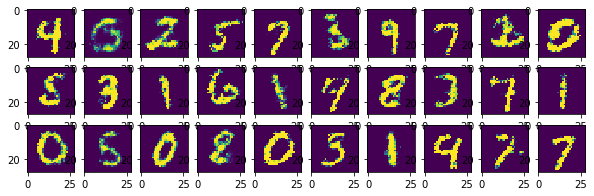

epoch: 61 	 last batch loss D: 1.2462437152862549 	 last batch loss G: 0.8855704665184021


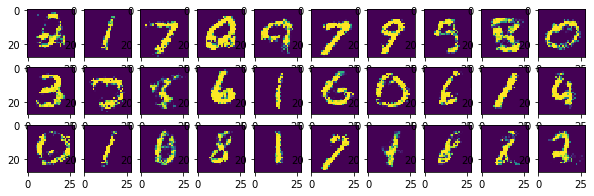

epoch: 62 	 last batch loss D: 1.2541711330413818 	 last batch loss G: 0.9587038159370422


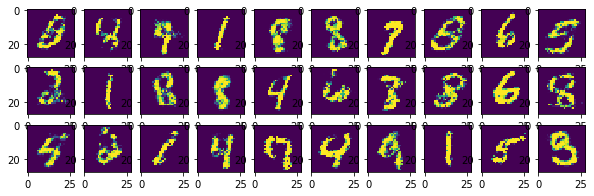

epoch: 63 	 last batch loss D: 1.2738914489746094 	 last batch loss G: 0.880101203918457


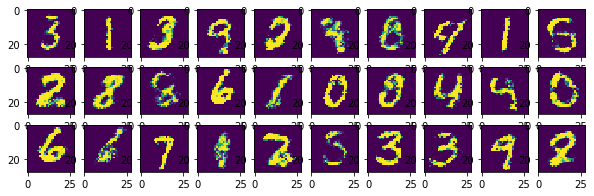

epoch: 64 	 last batch loss D: 1.04132878780365 	 last batch loss G: 0.9362356662750244


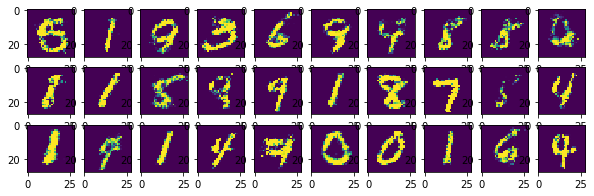

epoch: 65 	 last batch loss D: 1.3423676490783691 	 last batch loss G: 0.9614566564559937


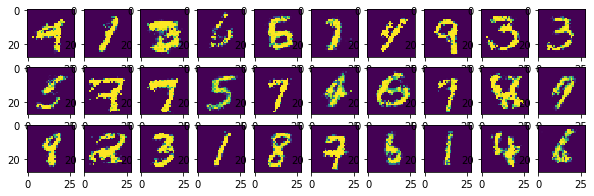

epoch: 66 	 last batch loss D: 1.217210054397583 	 last batch loss G: 0.8783607482910156


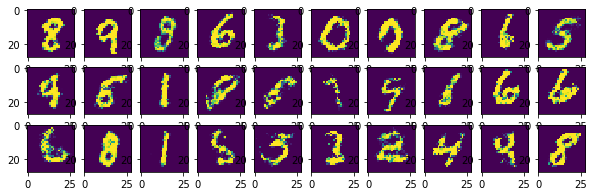

epoch: 67 	 last batch loss D: 1.255417823791504 	 last batch loss G: 0.8025228977203369


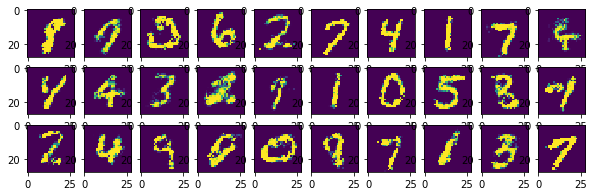

epoch: 68 	 last batch loss D: 1.1944128274917603 	 last batch loss G: 0.9694989919662476


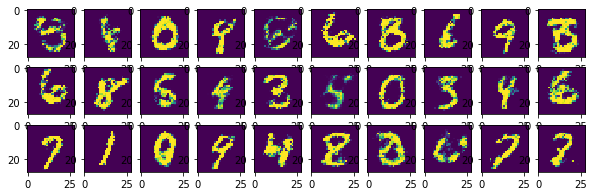

epoch: 69 	 last batch loss D: 1.3251006603240967 	 last batch loss G: 0.877106785774231


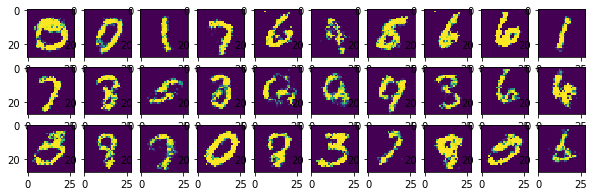

epoch: 70 	 last batch loss D: 1.2755975723266602 	 last batch loss G: 0.8791970610618591


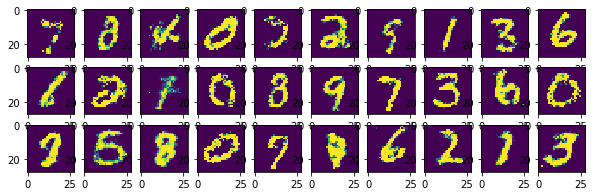

epoch: 71 	 last batch loss D: 1.2302665710449219 	 last batch loss G: 0.9447371363639832


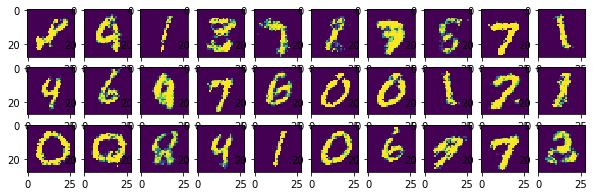

epoch: 72 	 last batch loss D: 1.2292293310165405 	 last batch loss G: 0.9610751271247864


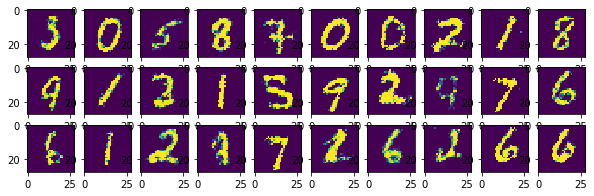

epoch: 73 	 last batch loss D: 1.1813024282455444 	 last batch loss G: 0.8577452301979065


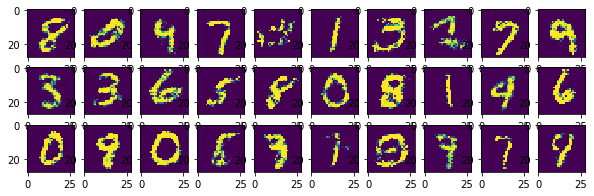

epoch: 74 	 last batch loss D: 1.0349769592285156 	 last batch loss G: 0.9218248724937439


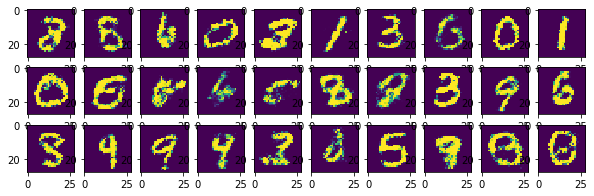

epoch: 75 	 last batch loss D: 1.365921974182129 	 last batch loss G: 0.8565896153450012


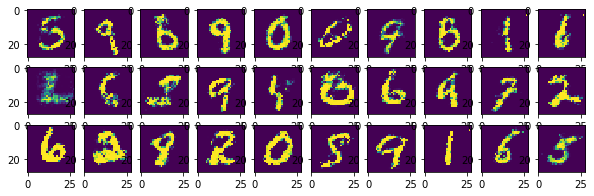

epoch: 76 	 last batch loss D: 1.2646584510803223 	 last batch loss G: 0.9009879231452942


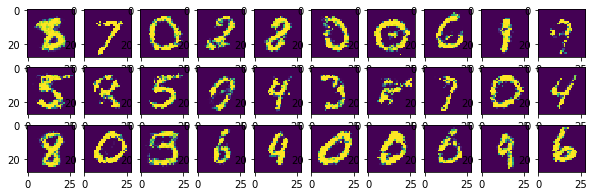

epoch: 77 	 last batch loss D: 1.1892156600952148 	 last batch loss G: 0.8037169575691223


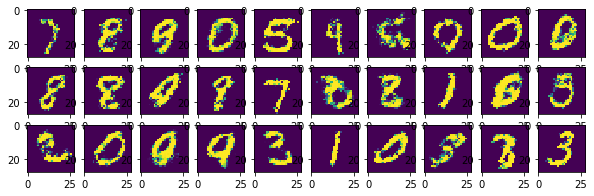

epoch: 78 	 last batch loss D: 1.2917585372924805 	 last batch loss G: 0.7751115560531616


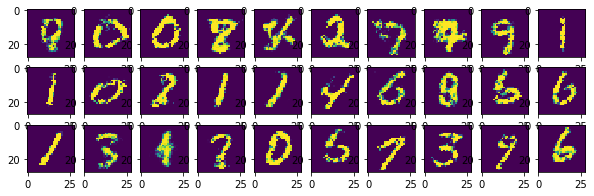

epoch: 79 	 last batch loss D: 1.324354648590088 	 last batch loss G: 0.810559868812561


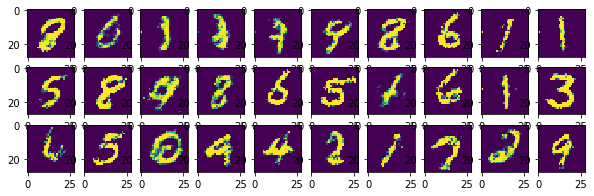

epoch: 80 	 last batch loss D: 1.1797912120819092 	 last batch loss G: 0.8288590312004089


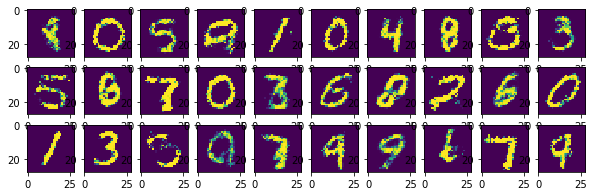

epoch: 81 	 last batch loss D: 1.3073275089263916 	 last batch loss G: 0.8855557441711426


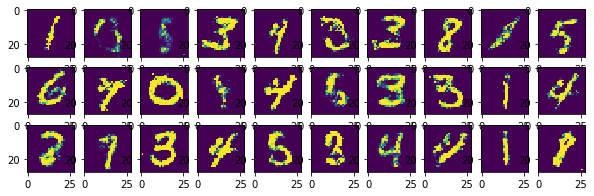

epoch: 82 	 last batch loss D: 1.2730473279953003 	 last batch loss G: 0.7551924586296082


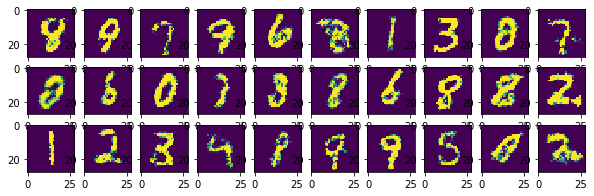

epoch: 83 	 last batch loss D: 1.1498234272003174 	 last batch loss G: 0.8081389665603638


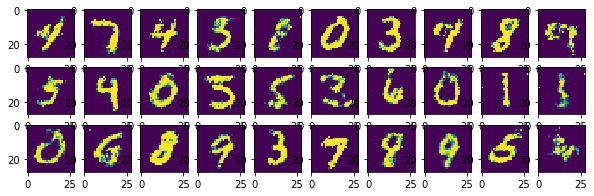

epoch: 84 	 last batch loss D: 1.165245771408081 	 last batch loss G: 0.8408117294311523


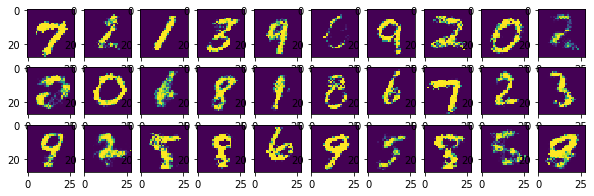

epoch: 85 	 last batch loss D: 1.3124396800994873 	 last batch loss G: 0.8340933918952942


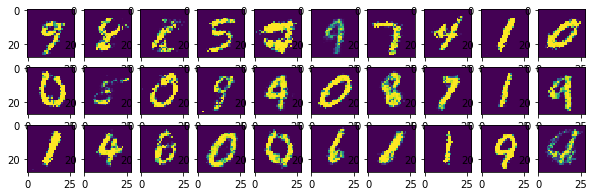

epoch: 86 	 last batch loss D: 1.340334415435791 	 last batch loss G: 0.8540631532669067


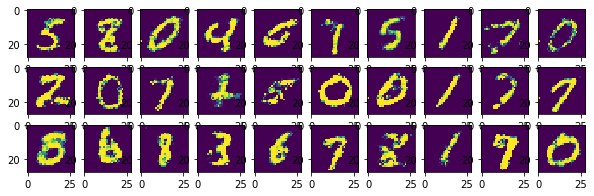

epoch: 87 	 last batch loss D: 1.2865681648254395 	 last batch loss G: 0.7867047786712646


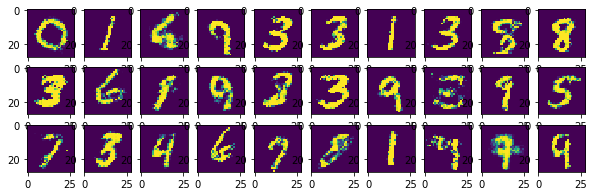

epoch: 88 	 last batch loss D: 1.2227568626403809 	 last batch loss G: 0.8160169720649719


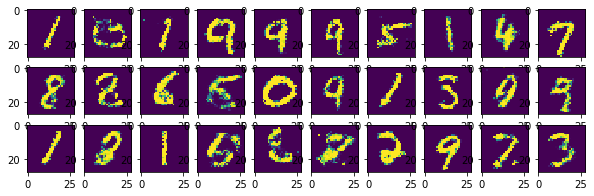

epoch: 89 	 last batch loss D: 1.2814887762069702 	 last batch loss G: 0.9779079556465149


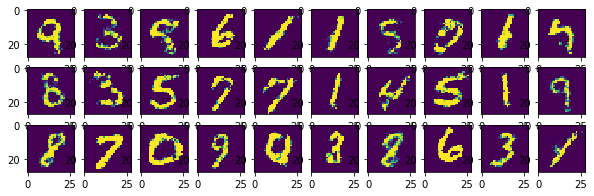

epoch: 90 	 last batch loss D: 1.3579018115997314 	 last batch loss G: 0.915495753288269


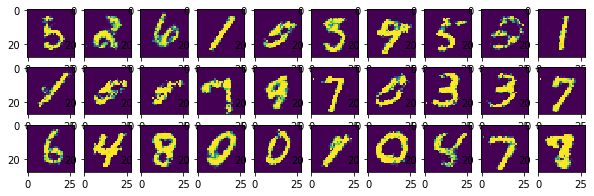

epoch: 91 	 last batch loss D: 1.3149728775024414 	 last batch loss G: 0.8397899270057678


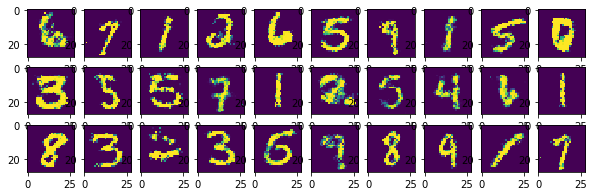

epoch: 92 	 last batch loss D: 1.3625807762145996 	 last batch loss G: 0.8545440435409546


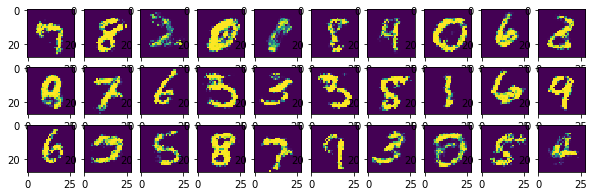

epoch: 93 	 last batch loss D: 1.3828141689300537 	 last batch loss G: 0.8494301438331604


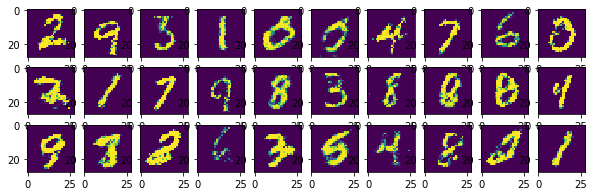

epoch: 94 	 last batch loss D: 1.3118950128555298 	 last batch loss G: 0.9027479290962219


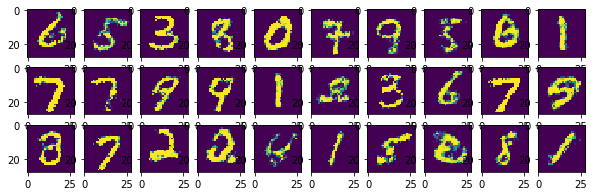

epoch: 95 	 last batch loss D: 1.3212742805480957 	 last batch loss G: 0.8303381204605103


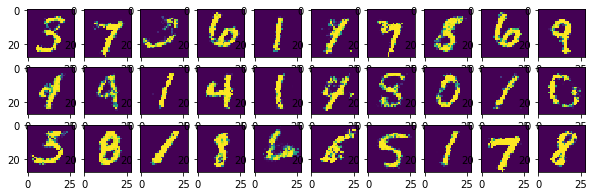

epoch: 96 	 last batch loss D: 1.2553879022598267 	 last batch loss G: 0.8922849893569946


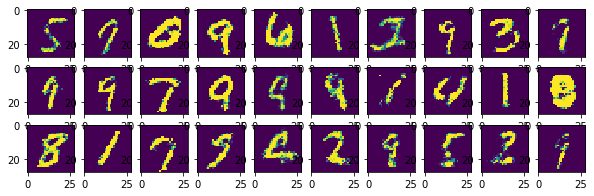

epoch: 97 	 last batch loss D: 1.2040884494781494 	 last batch loss G: 0.851544976234436


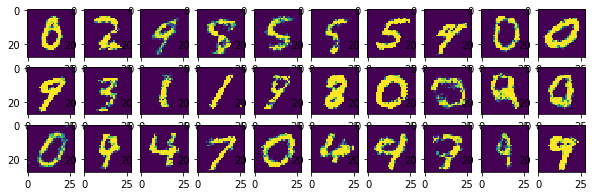

epoch: 98 	 last batch loss D: 1.3788304328918457 	 last batch loss G: 0.8279579877853394


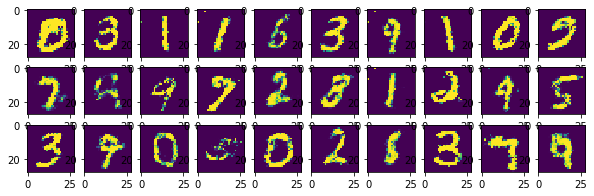

epoch: 99 	 last batch loss D: 1.1784255504608154 	 last batch loss G: 0.839806318283081


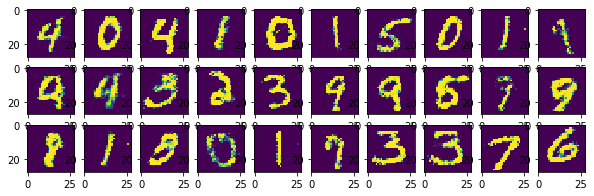

epoch: 100 	 last batch loss D: 1.3274915218353271 	 last batch loss G: 0.8168400526046753


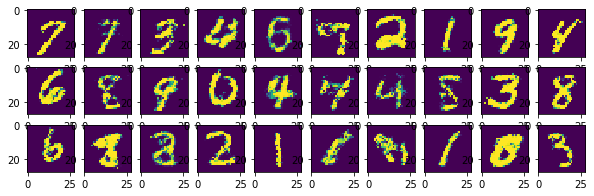

In [19]:
for epoch in range(N_EPOCH):
    for i, (img, label) in enumerate(train_loader):
        img = img.flatten(start_dim=1)
        ######################################
        ###    if you used linear layers   ###
        ###    you have to flat images     ###
        ######################################

        real_img = img
        
        fake_labels = torch.zeros(img.shape[0], 1)
        real_labels = torch.ones(img.shape[0], 1)

        ######################################
        ###     training discriminator     ###
        ### define loss_d for dicriminator ###
        ### be carful loss_d should not    ###
        ###        change generator !      ###
        ######################################
        
        z = torch.randn(img.shape[0], 128)
        fake_img = G(z)

        opt_D.zero_grad()
        
        loss_d = (F.binary_cross_entropy(D(fake_img.detach()), fake_labels) +
                  F.binary_cross_entropy(D(real_img), real_labels))
        
        loss_d.backward()
        opt_D.step()
        
        ######################################
        ###        training generator      ###
        ###  define loss_g for generator   ###
        ###   it is better to maximize     ###
        ###        generator loss !        ###
        ######################################
        z = torch.randn(img.shape[0], 128)
        fake_img = G(z)

        opt_G.zero_grad()
        
        loss_g =loss_g = F.binary_cross_entropy(D(fake_img), real_labels)
        
        loss_g.backward()
        opt_G.step()

    
    print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch + 1, 
                                                                               loss_d.item(), 
                                                                               loss_g.item()))

    for i in range(3):
        for j in range(10):
            plt.subplot(3, 10, i * 10 + j + 1)
            plt.imshow(fake_img[i * 10 + j].detach().cpu().view(28, 28).numpy())
    plt.show()

